# PyTorch Computer Vision & CNN
#coding/python #coding/deeplearning

**References**
- [YT: Learn PyTorch for Deep Learing](https://youtu.be/Z_ikDlimN6A?t=50419)
- [LearnPyTorch.io](https://www.learnpytorch.io/03_pytorch_computer_vision/)

## 01. Introduction to computer vision
**Potential Applications**
- BCC - dog or cat?
- MCC - what kind of food?
- object detection
- segmentation

**Outline**
- getting vision dataset using `torchvision.datasets`
- architecture of CNN
- E2E multi-class image classification
- steps in modeling with CNN
  - create CNN model
  - pick loss & optimizer
  - train a model
  - evaluate a model

## 02. Computer vision input and outputs
- CNN usually used in image data

**Method**
- numerically represent images as tensors
  - (NHWC): color channels last
  - (NCHW): color channels first
- feed into ML algorithm
- probabilites

**Steps**
1. Data Preperation
  - `torchvision.transforms`
  - `torch.utils.data.Dataset`
  - `torch.utils.data.DataLoader`
2. Build Model
  - `torch.nn`
  - `torch.nn.Module`
  - `torchvision.models`
3. Loss Fn & Optimizer
  - `torch.optim`
4. Evaluate Model
  - `torchmetrics`
5. Improve via Experimentation
  - `torch.utils.tensorboard`

## 03. What is a convolutional neural network?
**Architecture**
- input image
  - target image
- input layer
  - processed target image
  - `input_shape = [batch_size, ht, wd, color_channels]`
- convolution layer
  - extracts/learns features from target image
  - `torch.nn.ConvXd()`
- hidden activation/non-linear activation
  - adds non-linearity
  - usually `torch.nn.ReLU()`
- pooling layer
  - reduces dimensionality of learned features
  - usually `torch.nn.MaxPool2d()`
- output layer/linear layer
  - takes learned features and outputs into shape of target label
  - `torch.nn.Linear(out_features=[output-shape])
- output activation
  - convert output logits into prediction probabilities


## 04. TorchVision
**Computer Vision libraries**
- `torchvision`
- `torchvision.datasets`
- `torchvision.models`
- `torchvision.transforms`
- `torch.utils.data.Dataset`
- `torch.utils.data.DataLoader`

In [113]:
# Import Libraries
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


## 05. Getting a computer vision dataset
Dataset: FashionMNIST


In [114]:
# Setup Training Data
train_data = datasets.FashionMNIST
train_data = datasets.FashionMNIST(
    root='data',
    train=True, 
    download=True,
    transform=ToTensor(), # Transforms image or ndarray to tensor
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False, 
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

In [115]:
image, label = train_data[0]
class_names = train_data.classes
print(f"len(train_data), len(test_data)")
print(f"{class_names}")

len(train_data), len(test_data)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, 'Ankle boot')

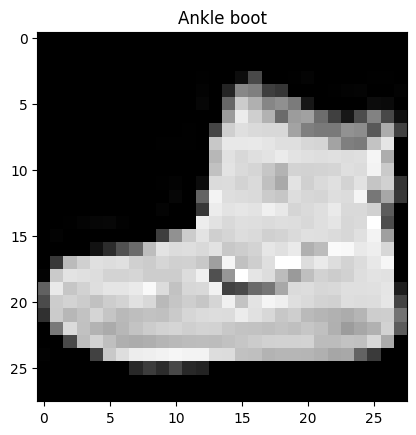

In [116]:
# Visualize data
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

# # Plot more images
# torch.manual_seed(42)
# fig = plt.figure(figsize=(9,9))
# rows, cols = 4,4
# for i in range(1, rows*cols+1):
#     random_idx = torch.randint(0)

## 06. Mini-batches


## 07. Creating DataLoaders
- Currently, data is in the form of PyTorch Datasets
- DataLoader: turns dataset into a Python iterable

**Creating Batches**
1. allows the cpu to store smaller batches (vs full)
   - computationally efficient
   - common batch size = 32
2. gives NN more chances to update its gradient per epoch

**Steps**
1. `torchvision.datasets.FashionMNIST`
2. `torch.utils.data.DataLoader`
   - `DataLoader(dataset, batch_size, shuffle=True)`


Length: 1875 | 313
torch.Size([32, 1, 28, 28]), torch.Size([32])
Image size: torch.Size([1, 28, 28])


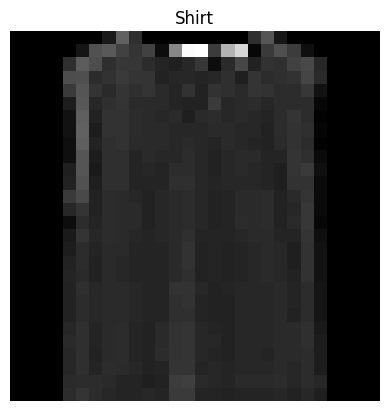

In [117]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                    batch_size=BATCH_SIZE,
                    shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                    batch_size=BATCH_SIZE,
                    shuffle=True)

# Visualize
print(f"Length: {len(train_dataloader)} | {len(test_dataloader)}")

train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"{train_features_batch.shape}, {train_labels_batch.shape}")

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")

Building a **baseline** model is a best practice, starting with a simple model and add complexity from there.

In [118]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]
print(f"{x.shape}")

output = flatten_model(x)
print(f"{output.shape}")

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [119]:
# Define base model
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [120]:
# Create base model instance
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [121]:
# Import external file
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('File exists.')
else:
  print('Downloading file...')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)


File exists.


**Typical Evaluation Metrics**
- model performance (loss and accuracy)
- how fast it runs

In [122]:
# Setup loss, optimizer, and eval metrics
from helper_functions import accuracy_fn

loss_fn_v0 = nn.CrossEntropyLoss()
optimizer_v0 = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [123]:
# Setup timer metric
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end - start
  print(f"Train time: {total_time:.3f} seconds")
  return total_time

start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time)

Train time: 0.000 seconds


1.2400007108226418e-05

## 08. Training and testing loops for batched data
Creating a training loop
- loop through epochs
- loop through training batches
- loop through testing batches
- print out what's happening

In [124]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start = timer()

epochs = 3 

# Create train & test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  ### TRAINING
  train_loss = 0
  ## NOTE: model parameters are updated per batch
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    # 2. Calculate the loss
    loss = loss_fn_v0(y_pred, y)
    train_loss += loss # to be averaged per batch
    # 3. Optimizer zero grad
    optimizer_v0.zero_grad()
    # 4. Loss backward
    loss.backward()
    # 5. Optimizer step
    optimizer_v0.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader)

  ### TESTING
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)
      # 2. Calc loss
      test_loss += loss_fn_v0(test_pred, y_test)
      # 3. Calc accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")

train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start, end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:07<00:14,  7.35s/it]


Train loss: 0.5904 | Test loss: 0.5102, test acc: 82.0387
Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:14<00:07,  7.18s/it]


Train loss: 0.4743 | Test loss: 0.5268, test acc: 81.6793
Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:21<00:00,  7.29s/it]


Train loss: 0.4537 | Test loss: 0.5126, test acc: 82.9972
Train time: 21.862 seconds


In [125]:
# Make predictions
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
        # Make predictions
        y_pred = model(X)

        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc,
          }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model_0, data_loader=test_dataloader, loss_fn=loss_fn_v0, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5119837522506714,
 'model_acc': 83.02715654952077}

## 09. Running experiments on the GPU

In [126]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

## 10. Creating a model with non-linear functions


In [127]:
# Define base model
from torch import nn
from torch import utils

class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU(),

        )

    def forward(self, x):
        return self.layer_stack(x)

In [128]:
# Create instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28, hidden_units=10, output_shape=len(class_names))

# Create loss function and optimizer
lossfn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

## 11. Creating a train/test loop
Create a function for training and testing

### Creating reusable functions

In [129]:
### TRAIN STEP
def train_step(
  model: torch.nn.Module,
  data_loader: DataLoader,
  loss_fn:  torch.nn.Module,
  optimizer: torch.optim.Optimizer,
  accuracy_fn, 
  device: torch.device = "cpu"
  ):
  
  train_loss, train_acc = 0, 0

  ## NOTE: model parameters are updated per batch
  for batch, (X, y) in enumerate(data_loader):
    model.train()
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss # to be averaged per batch
    # train_acc += accuracy_fn(y_true=y, y_pred=y_pred)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward
    loss.backward()
    # 5. Optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples.")

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")

### TEST STEP
def test_step(
  model: torch.nn.Module,
  data_loader: DataLoader,
  loss_fn:  torch.nn.Module,
  accuracy_fn, 
  device: torch.device = "cpu",
  ):
  
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():  # Turn on inference mode context manager
    for X_test, y_test in data_loader:
      # 1. Forward pass
      test_pred = model(X_test)
      # 2. Calc loss
      test_loss += loss_fn(test_pred, y_test)
      # 3. Calc accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"\nTest loss: {test_loss:.5f} | Test acc: {test_acc:.4f}")

### Training and Testing the model

In [130]:
train_dataloader.__sizeof__()

32

In [131]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=lossfn_1,
             optimizer=optimizer_1,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=lossfn_1,
            accuracy_fn=accuracy_fn
            )
  
train_time_end = timer()
total_train_time = print_train_time(start=train_time_start, end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 1.09199 | Train acc: 0.00


 33%|███▎      | 1/3 [00:07<00:14,  7.43s/it]


Test loss: 0.95690 | Test acc: 64.9760
Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.73779 | Train acc: 0.00


 67%|██████▋   | 2/3 [00:15<00:07,  7.54s/it]


Test loss: 0.72388 | Test acc: 74.2113
Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.66776 | Train acc: 0.00


100%|██████████| 3/3 [00:22<00:00,  7.49s/it]


Test loss: 0.68751 | Test acc: 75.6390
Train time: 22.466 seconds


In [132]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=lossfn_1,
                             accuracy_fn=accuracy_fn,
                             )

print(model_0_results)
print(model_1_results)


{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.5119837522506714, 'model_acc': 83.02715654952077}
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6879838705062866, 'model_acc': 75.62899361022365}


## 12. Convolutional neural networks (overview)
- known for capabilities for finding patterns in visual data
- Structure
  - convolutional layer
  - ReLU
  - Pooling
- Architecture
  - CNN blocks
  - Classifier Layer
https://poloclub.github.io/cnn-explainer/

## 13. Coding a CNN


In [133]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture replicayting TinyVGG
  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)      
    )    
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=output_shape, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)      
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
      # Note: you can check the shape of the output layers by running it with a print
    )    

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

### Stepping througn `nn.COnv2d()`


## 14. Breaking down nn.Conv2d/nn.MaxPool2d


In [134]:
### CHECK EFFECT OF EACH LAYER TO SHAPE

torch.manual_seed(42)

# Create a batch of image
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3, 3), stride=1, padding=0)
pool_layer = nn.MaxPool2d(kernel_size=2)

print(f"0: {test_image.shape}")
print(f"1: {test_image.unsqueeze(0).shape}")

test_image_thorugh_conv = conv_layer(test_image.unsqueeze(0))
print(f"2: {test_image_thorugh_conv.shape}")

test_image_final = pool_layer(test_image_thorugh_conv)
print(f"3: {test_image_final.shape}")

0: torch.Size([3, 64, 64])
1: torch.Size([1, 3, 64, 64])
2: torch.Size([1, 10, 62, 62])
3: torch.Size([1, 10, 31, 31])


In [135]:
### CHECK WHAT THE MAX POOL LAYER DO
### (Finds the max value from a kernel)

torch.manual_seed(32)
random_tensor = torch.randn(size=(1,1,2,2))

pool_layer = nn.MaxPool2d(kernel_size=2)
pool_tensor = pool_layer(random_tensor)

print(f"0: {random_tensor}")
print(f"0: {random_tensor.shape}")
print(f"1: {pool_tensor}")
print(f"1: {pool_tensor.shape}")

0: tensor([[[[ 0.8651,  0.0284],
          [ 0.5256, -0.3633]]]])
0: torch.Size([1, 1, 2, 2])
1: tensor([[[[0.8651]]]])
1: torch.Size([1, 1, 1, 1])


In [136]:
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

## 15. Training our first CNN


In [137]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=lossfn_1,
             optimizer=optimizer_1,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model_2,
          data_loader=test_dataloader,
          loss_fn=lossfn_1,
          accuracy_fn=accuracy_fn
          )
  
train_time_end = timer()
total_train_time_model_2 = print_train_time(start=train_time_start, end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 2.30365 | Train acc: 0.00


 33%|███▎      | 1/3 [00:22<00:45, 22.57s/it]


Test loss: 2.30368 | Test acc: 10.1937
Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 2.30365 | Train acc: 0.00


 67%|██████▋   | 2/3 [00:43<00:21, 21.72s/it]


Test loss: 2.30366 | Test acc: 10.2037
Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 2.30365 | Train acc: 0.00


100%|██████████| 3/3 [01:04<00:00, 21.65s/it]


Test loss: 2.30367 | Test acc: 10.1837
Train time: 64.950 seconds


In [138]:
# Get model_2 results
model_2_results = eval_model(
  model=model_2,
  data_loader=test_dataloader,
  loss_fn=lossfn_1,
  accuracy_fn=accuracy_fn
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3036932945251465,
 'model_acc': 10.20367412140575}

In [139]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.511984,83.027157
1,FashionMNISTModelV1,0.687984,75.628994
2,FashionMNISTModelV2,2.303693,10.203674


In [140]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.511984,83.027157,21.861962
1,FashionMNISTModelV1,0.687984,75.628994,22.465609
2,FashionMNISTModelV2,2.303693,10.203674,64.950424


## 16. Making predictions on random test samples

Make and evaluate random predictions with best model

In [147]:
def make_predictions(model: torch.nn.Module, 
                     data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model output raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> pred probs)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

Text(0.5, 1.0, 'Ankle boot')

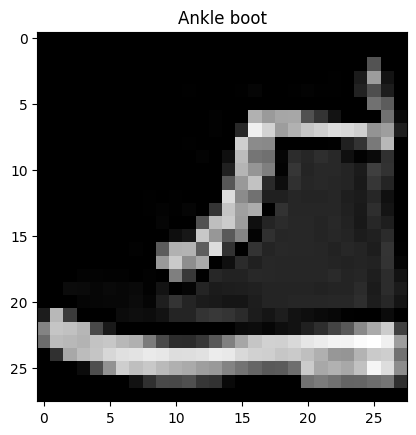

In [151]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])


In [155]:
# Make predictions
pred_probs = make_predictions(model=model_1,
                              data=test_samples
)

print(pred_probs[:2])

# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)

tensor([[3.3763e-02, 3.3763e-02, 3.3763e-02, 3.3763e-02, 3.3763e-02, 3.3763e-02,
         3.3763e-02, 4.5424e-02, 6.0273e-02, 6.5797e-01],
        [2.3459e-06, 2.3459e-06, 2.3459e-06, 2.3459e-06, 2.3459e-06, 2.9575e-04,
         2.3459e-06, 9.9145e-01, 1.2081e-04, 8.1146e-03]])
tensor([9, 7, 2, 0, 1, 0, 0, 9, 4])


## 17. Plotting our best model predictions


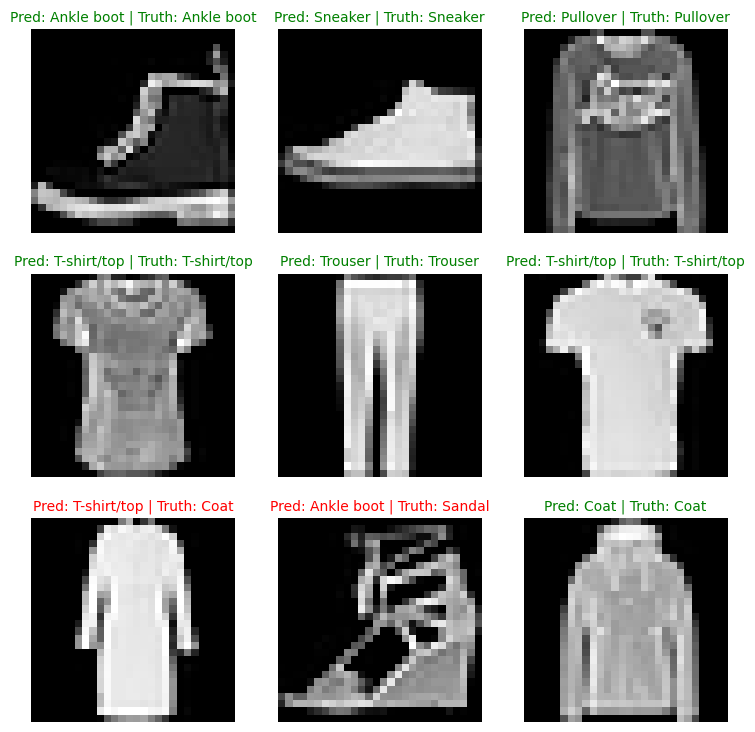

In [156]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)
  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  # Find the prediction
  pred_label = class_names[pred_classes[i]]
  # Get the truth label
  truth_label = class_names[test_labels[i]]

  #Create a title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

## 18. Evaluating model predictions with a confusion matrix

Evaluates classification models visually
1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [157]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred)

## Making a confusion matrix

import mlxtend




Making predictions: 100%|██████████| 313/313 [00:01<00:00, 168.73it/s]


[Link](https://www.youtube.com/watch?v=Z_ikDlimN6A&t=69546s)